# Assignment 1 


<font size="2.7">
Name: Benjamin Fever <br>
Student Number: 300515215 <br>
Due Date: 07-08-2023
</font>

## 1.0 Classification [70 points]

#### Imports

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from scipy.io import arff

#### Load Data

In [19]:
# Load steel plate data
steel_plate_data, meta = arff.loadarff("data/steelPlatesData.arff")
steel_plate_data = pd.DataFrame(steel_plate_data)

# Load bank note data
bank_note_data, meta = arff.loadarff("data/bankNoteData.arff")
bank_note_data = pd.DataFrame(bank_note_data)

# Load ionsphere data
ionsphere_data, meta = arff.loadarff("data/ionosphereData.arff")
ionsphere_data = pd.DataFrame(ionsphere_data)
ionsphere_data = ionsphere_data.rename(columns={"class" : "Class"})

all_data = [steel_plate_data, ionsphere_data, bank_note_data]

### K Nearest Neighbor (KNN) Classification

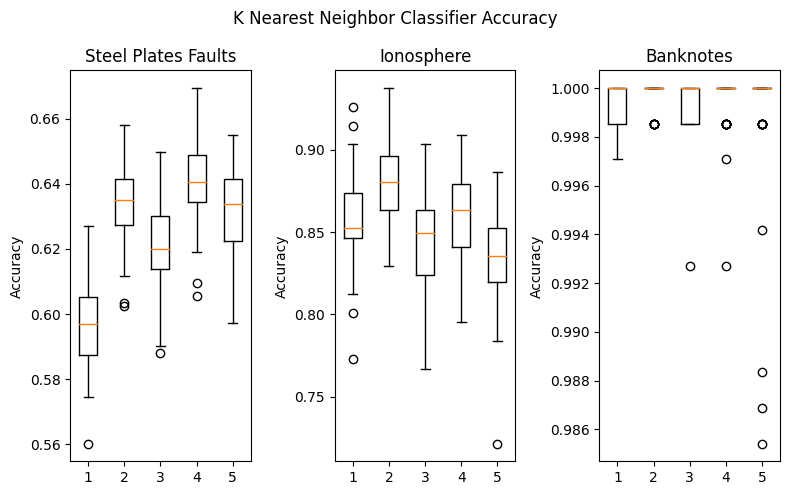

In [20]:
accuracy = []
params = [1, 2, 3, 4, 5]
for j in range(0, len(all_data)):
    accuracy.append([])
    for param in range(0, len(params)):
        accuracy[j].append([])
        for i in range(0, 50):
            # ta_x is the training features
            # ta_y is the training label
            # te_x is the test features
            # te_y is the test label
            ta_x, te_x, ta_y, te_y = train_test_split(all_data[j].drop(columns="Class", axis=1), all_data[j]["Class"], test_size=0.5, random_state=i)

            ta_y = LabelEncoder().fit_transform(ta_y)
            te_y = LabelEncoder().fit_transform(te_y)

            knn_classifier = KNeighborsClassifier(n_neighbors=params[param])
            knn_classifier.fit(np.array(ta_x), np.array(ta_y))

            pred_y = knn_classifier.predict(np.array(te_x))
            accuracy[j][param].append(accuracy_score(te_y, pred_y))

fig, ax = plt.subplots(1, 3, figsize=(8, 5))
fig.suptitle("K Nearest Neighbor Classifier Accuracy")


# Plot the first box plot in the first subplot
ax[0].boxplot(accuracy[0])
ax[0].set_title("Steel Plates Faults")
ax[0].set_xticklabels(params)
ax[0].set_ylabel("Accuracy")

# Plot the second box plot in the second subplot
ax[1].boxplot(accuracy[1])
ax[1].set_title("Ionosphere")
ax[1].set_xticklabels(params)
ax[1].set_ylabel("Accuracy")

# Plot the third box plot in the third subplot
ax[2].boxplot(accuracy[2])
ax[2].set_title("Banknotes")
ax[2].set_xticklabels(params)
ax[2].set_ylabel("Accuracy")

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

### Gaussian Naive Bayes Classifier

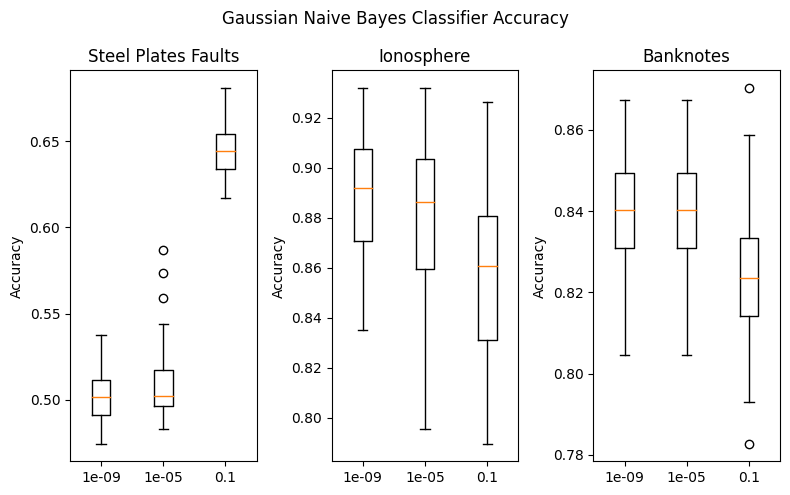

In [21]:
accuracy = []
params = [1e-9,1e-5,1e-1]
for j in range(0, len(all_data)):
    accuracy.append([])
    for param in range(0, len(params)):
        accuracy[j].append([])
        for i in range(0, 50):
            # ta_x is the training features
            # ta_y is the training label
            # te_x is the test features
            # te_y is the test label
            ta_x, te_x, ta_y, te_y = train_test_split(all_data[j].drop(columns="Class", axis=1), all_data[j]["Class"], test_size=0.5, random_state=i)

            ta_y = LabelEncoder().fit_transform(ta_y)
            te_y = LabelEncoder().fit_transform(te_y)

            gnb_classifier = GaussianNB(var_smoothing=params[param])
            gnb_classifier.fit(np.array(ta_x), np.array(ta_y))

            pred_y = gnb_classifier.predict(np.array(te_x))
            accuracy[j][param].append(accuracy_score(te_y, pred_y))

fig, ax = plt.subplots(1, 3, figsize=(8, 5))
fig.suptitle("Gaussian Naive Bayes Classifier Accuracy")


# Plot the first box plot in the first subplot
ax[0].boxplot(accuracy[0])
ax[0].set_title("Steel Plates Faults")
ax[0].set_xticklabels(params)
ax[0].set_ylabel("Accuracy")

# Plot the second box plot in the second subplot
ax[1].boxplot(accuracy[1])
ax[1].set_title("Ionosphere")
ax[1].set_xticklabels(params)
ax[1].set_ylabel("Accuracy")

# Plot the third box plot in the third subplot
ax[2].boxplot(accuracy[2])
ax[2].set_title("Banknotes")
ax[2].set_xticklabels(params)
ax[2].set_ylabel("Accuracy")

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

### Logistic Regression Classifier

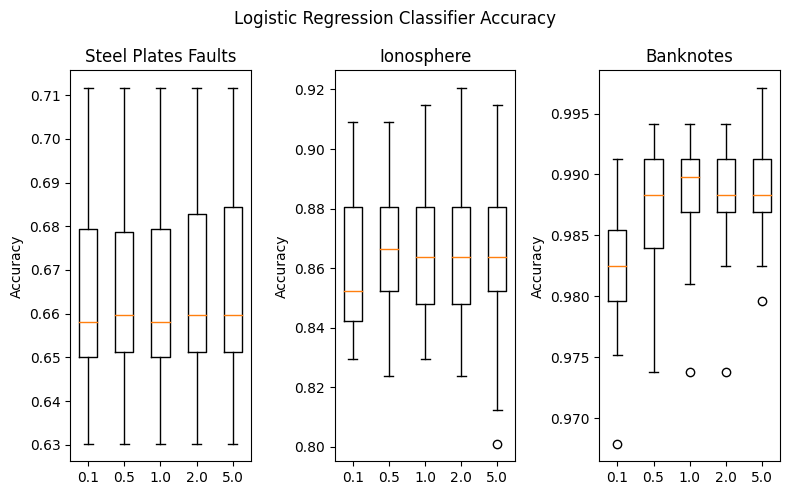

In [22]:
accuracy = []
params = [0.1, 0.5, 1.0, 2.0, 5.0]
for j in range(0, len(all_data)):
    accuracy.append([])
    for param in range(0, len(params)):
        accuracy[j].append([])
        for i in range(0, 50):
            # ta_x is the training features
            # ta_y is the training label
            # te_x is the test features
            # te_y is the test label
            ta_x, te_x, ta_y, te_y = train_test_split(all_data[j].drop(columns="Class", axis=1), all_data[j]["Class"], test_size=0.5, random_state=i)

            ta_y = LabelEncoder().fit_transform(ta_y)
            te_y = LabelEncoder().fit_transform(te_y)

            lgr_classifier = LogisticRegression(C=params[param], max_iter=1000)
            lgr_classifier.fit(np.array(ta_x), np.array(ta_y))

            pred_y = lgr_classifier.predict(np.array(te_x))
            accuracy[j][param].append(accuracy_score(te_y, pred_y))

fig, ax = plt.subplots(1, 3, figsize=(8, 5))
fig.suptitle("Logistic Regression Classifier Accuracy")


# Plot the first box plot in the first subplot
ax[0].boxplot(accuracy[0])
ax[0].set_title("Steel Plates Faults")
ax[0].set_xticklabels(params)
ax[0].set_ylabel("Accuracy")

# Plot the second box plot in the second subplot
ax[1].boxplot(accuracy[1])
ax[1].set_title("Ionosphere")
ax[1].set_xticklabels(params)
ax[1].set_ylabel("Accuracy")

# Plot the third box plot in the third subplot
ax[2].boxplot(accuracy[2])
ax[2].set_title("Banknotes")
ax[2].set_xticklabels(params)
ax[2].set_ylabel("Accuracy")

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

### Decision Tree Classifier

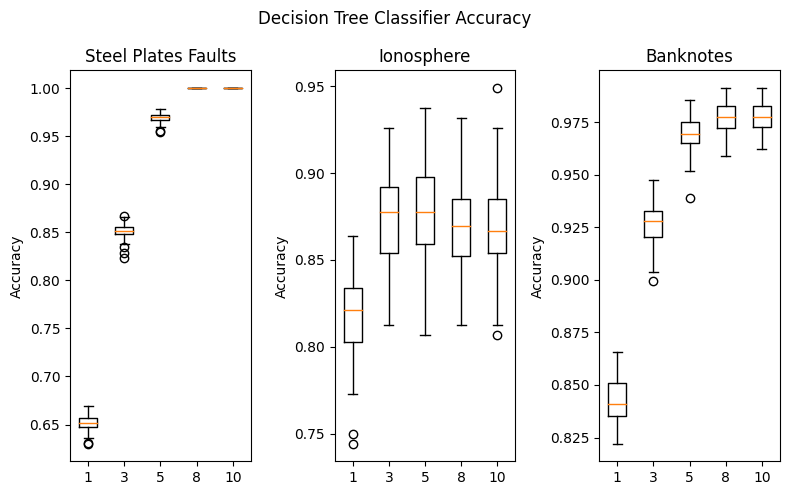

In [23]:
accuracy = []
params = [1, 3, 5, 8, 10]
for j in range(0, len(all_data)):
    accuracy.append([])
    for param in range(0, len(params)):
        accuracy[j].append([])
        for i in range(0, 50):
            # ta_x is the training features
            # ta_y is the training label
            # te_x is the test features
            # te_y is the test label
            ta_x, te_x, ta_y, te_y = train_test_split(all_data[j].drop(columns="Class", axis=1), all_data[j]["Class"], test_size=0.5, random_state=i)

            ta_y = LabelEncoder().fit_transform(ta_y)
            te_y = LabelEncoder().fit_transform(te_y)

            classifier = DecisionTreeClassifier(max_depth=params[param])
            classifier.fit(np.array(ta_x), np.array(ta_y))

            pred_y = classifier.predict(np.array(te_x))
            accuracy[j][param].append(accuracy_score(te_y, pred_y))

fig, ax = plt.subplots(1, 3, figsize=(8, 5))
fig.suptitle("Decision Tree Classifier Accuracy")


# Plot the first box plot in the first subplot
ax[0].boxplot(accuracy[0])
ax[0].set_title("Steel Plates Faults")
ax[0].set_xticklabels(params)
ax[0].set_ylabel("Accuracy")

# Plot the second box plot in the second subplot
ax[1].boxplot(accuracy[1])
ax[1].set_title("Ionosphere")
ax[1].set_xticklabels(params)
ax[1].set_ylabel("Accuracy")

# Plot the third box plot in the third subplot
ax[2].boxplot(accuracy[2])
ax[2].set_title("Banknotes")
ax[2].set_xticklabels(params)
ax[2].set_ylabel("Accuracy")

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

### Gradient Boosting Classifier

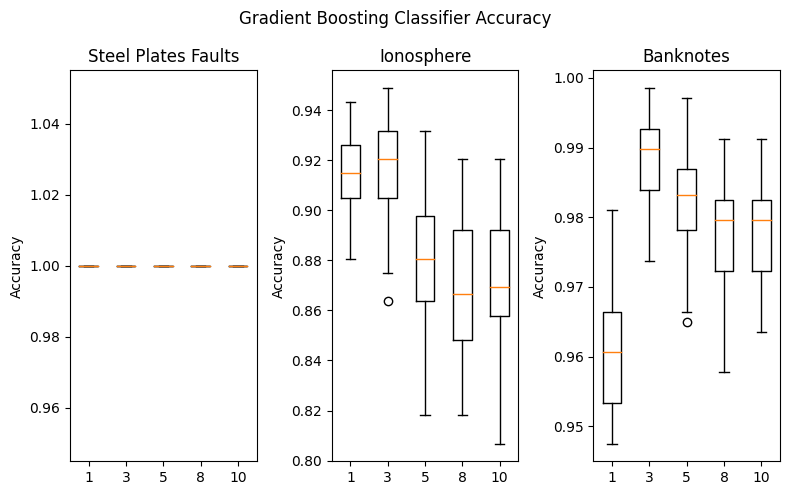

In [24]:
accuracy = []
params = [1, 3, 5, 8, 10]
for j in range(0, len(all_data)):
    accuracy.append([])
    for param in range(0, len(params)):
        accuracy[j].append([])
        for i in range(0, 50):
            # ta_x is the training features
            # ta_y is the training label
            # te_x is the test features
            # te_y is the test label
            ta_x, te_x, ta_y, te_y = train_test_split(all_data[j].drop(columns="Class", axis=1), all_data[j]["Class"], test_size=0.5, random_state=i)

            ta_y = LabelEncoder().fit_transform(ta_y)
            te_y = LabelEncoder().fit_transform(te_y)

            classifier = GradientBoostingClassifier(max_depth=params[param])
            classifier.fit(np.array(ta_x), np.array(ta_y))

            pred_y = classifier.predict(np.array(te_x))
            accuracy[j][param].append(accuracy_score(te_y, pred_y))

fig, ax = plt.subplots(1, 3, figsize=(8, 5))
fig.suptitle("Gradient Boosting Classifier Accuracy")


# Plot the first box plot in the first subplot
ax[0].boxplot(accuracy[0])
ax[0].set_title("Steel Plates Faults")
ax[0].set_xticklabels(params)
ax[0].set_ylabel("Accuracy")

# Plot the second box plot in the second subplot
ax[1].boxplot(accuracy[1])
ax[1].set_title("Ionosphere")
ax[1].set_xticklabels(params)
ax[1].set_ylabel("Accuracy")

# Plot the third box plot in the third subplot
ax[2].boxplot(accuracy[2])
ax[2].set_title("Banknotes")
ax[2].set_xticklabels(params)
ax[2].set_ylabel("Accuracy")

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

### Random Forest Classifier

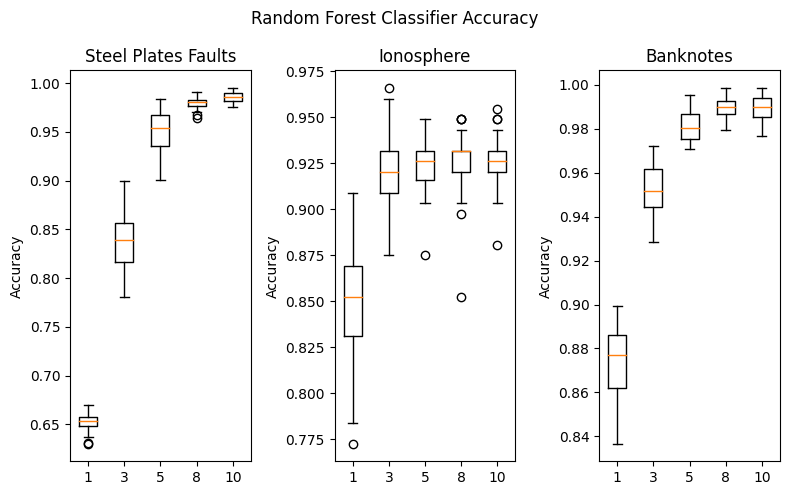

In [25]:
accuracy = []
params = [1, 3, 5, 8, 10]
for j in range(0, len(all_data)):
    accuracy.append([])
    for param in range(0, len(params)):
        accuracy[j].append([])
        for i in range(0, 50):
            # ta_x is the training features
            # ta_y is the training label
            # te_x is the test features
            # te_y is the test label
            ta_x, te_x, ta_y, te_y = train_test_split(all_data[j].drop(columns="Class", axis=1), all_data[j]["Class"], test_size=0.5, random_state=i)

            ta_y = LabelEncoder().fit_transform(ta_y)
            te_y = LabelEncoder().fit_transform(te_y)

            classifier = RandomForestClassifier(max_depth=params[param])
            classifier.fit(np.array(ta_x), np.array(ta_y))

            pred_y = classifier.predict(np.array(te_x))
            accuracy[j][param].append(accuracy_score(te_y, pred_y))

fig, ax = plt.subplots(1, 3, figsize=(8, 5))
fig.suptitle("Random Forest Classifier Accuracy")


# Plot the first box plot in the first subplot
ax[0].boxplot(accuracy[0])
ax[0].set_title("Steel Plates Faults")
ax[0].set_xticklabels(params)
ax[0].set_ylabel("Accuracy")

# Plot the second box plot in the second subplot
ax[1].boxplot(accuracy[1])
ax[1].set_title("Ionosphere")
ax[1].set_xticklabels(params)
ax[1].set_ylabel("Accuracy")

# Plot the third box plot in the third subplot
ax[2].boxplot(accuracy[2])
ax[2].set_title("Banknotes")
ax[2].set_xticklabels(params)
ax[2].set_ylabel("Accuracy")

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

### MLP Classifier

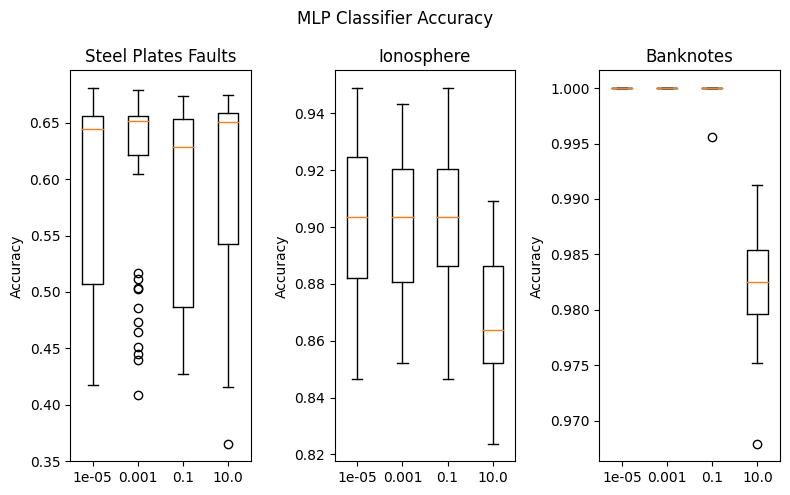

In [26]:
accuracy = []
params = [1e-5, 1e-3, 0.1, 10.0]
for j in range(0, len(all_data)):
    accuracy.append([])
    for param in range(0, len(params)):
        accuracy[j].append([])
        for i in range(0, 50):
            # ta_x is the training features
            # ta_y is the training label
            # te_x is the test features
            # te_y is the test label
            ta_x, te_x, ta_y, te_y = train_test_split(all_data[j].drop(columns="Class", axis=1), all_data[j]["Class"], test_size=0.5, random_state=i)

            ta_y = LabelEncoder().fit_transform(ta_y)
            te_y = LabelEncoder().fit_transform(te_y)

            classifier = MLPClassifier(alpha=params[param], max_iter=1000)
            classifier.fit(np.array(ta_x), np.array(ta_y))

            pred_y = classifier.predict(np.array(te_x))
            accuracy[j][param].append(accuracy_score(te_y, pred_y))

fig, ax = plt.subplots(1, 3, figsize=(8, 5))
fig.suptitle("MLP Classifier Accuracy")


# Plot the first box plot in the first subplot
ax[0].boxplot(accuracy[0])
ax[0].set_title("Steel Plates Faults")
ax[0].set_xticklabels(params)
ax[0].set_ylabel("Accuracy")

# Plot the second box plot in the second subplot
ax[1].boxplot(accuracy[1])
ax[1].set_title("Ionosphere")
ax[1].set_xticklabels(params)
ax[1].set_ylabel("Accuracy")

# Plot the third box plot in the third subplot
ax[2].boxplot(accuracy[2])
ax[2].set_title("Banknotes")
ax[2].set_xticklabels(params)
ax[2].set_ylabel("Accuracy")

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

## External Resourses

[^1]: The resourse used to split the data https://www.geeksforgeeks.org/how-to-do-train-test-split-using-sklearn-in-python/